# QQQ 定投计算

K 线数据在 `data/QQQ.csv`, 2023-12-31 前.

In [1]:
import pandas as pd
from IPython.display import display


data = pd.read_csv('data/QQQ.csv')
display(data)

,Unnamed: 0,股票代码,日期,开盘价,最高价,最低价,收盘价,adjClose,成交量(股),change,changePercent,成交量加权平均价格(vwap)
0,0,QQQ,1999-03-10,51.13,51.160,50.280,51.06,43.60,5232000.0,-0.07,-0.13691,50.83
1,1,QQQ,1999-03-11,51.44,51.730,50.310,51.31,43.82,9688600.0,-0.13,-0.25272,51.12
2,2,QQQ,1999-03-12,51.13,51.160,49.660,50.06,42.75,8743600.0,-1.07,-2.09000,50.29
3,3,QQQ,1999-03-15,50.44,51.560,49.910,51.50,43.98,6369000.0,1.06,2.10000,50.99
4,4,QQQ,1999-03-16,51.72,52.160,51.160,51.94,44.35,4905800.0,0.22,0.42537,51.75
...,...,...,...,...,...,...,...,...,...,...,...,...
6239,6239,QQQ,2023-12-22,409.00,409.970,406.479,408.38,408.17,34301753.0,-0.62,-0.15159,408.58
6240,6240,QQQ,2023-12-26,409.25,411.560,409.150,410.88,410.66,22722545.0,1.63,0.39829,410.31
6241,6241,QQQ,2023-12-27,410.95,411.788,410.080,411.50,411.50,31891481.0,0.55,0.13384,410.89
6242,6242,QQQ,2023-12-28,412.67,412.920,410.940,411.30,411.30,26979280.0,-1.37,-0.33198,411.86


In [2]:
data['日期'] = pd.to_datetime(data['日期'])


In [3]:
import numpy as np

# 计算每个月需要购买的股票数量，假设每月投资在月初，使用开盘价购买
# 只在每个月的第一天购买
data['购买股数'] = np.where(data['日期'].dt.day == 1, 100 / data['开盘价'], 0)

# 计算累积购买股数
data['累积购买股数'] = np.cumsum(data['购买股数'])

# 计算目前的总价值，假设能卖出的价格为最后一天的收盘价
sell_price = data.iloc[0]['收盘价']
data['总价值'] = data['累积购买股数'] * sell_price

# 计算收益率 (当前总价值 - 投入总资金) / 投入总资金
data['投入总资金'] = np.cumsum(np.where(data['日期'].dt.day == 1, 100, 0))
data['收益率'] = (data['总价值'] - data['投入总资金']) / data['投入总资金']

# 显示数据
display(data)

,Unnamed: 0,股票代码,日期,开盘价,最高价,最低价,收盘价,adjClose,成交量(股),change,changePercent,成交量加权平均价格(vwap),购买股数,累积购买股数,总价值,投入总资金,收益率
0,0,QQQ,1999-03-10,51.13,51.160,50.280,51.06,43.60,5232000.0,-0.07,-0.13691,50.83,0.0,0.000000,0.000000,0,NaN
1,1,QQQ,1999-03-11,51.44,51.730,50.310,51.31,43.82,9688600.0,-0.13,-0.25272,51.12,0.0,0.000000,0.000000,0,NaN
2,2,QQQ,1999-03-12,51.13,51.160,49.660,50.06,42.75,8743600.0,-1.07,-2.09000,50.29,0.0,0.000000,0.000000,0,NaN
3,3,QQQ,1999-03-15,50.44,51.560,49.910,51.50,43.98,6369000.0,1.06,2.10000,50.99,0.0,0.000000,0.000000,0,NaN
4,4,QQQ,1999-03-16,51.72,52.160,51.160,51.94,44.35,4905800.0,0.22,0.42537,51.75,0.0,0.000000,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,6239,QQQ,2023-12-22,409.00,409.970,406.479,408.38,408.17,34301753.0,-0.62,-0.15159,408.58,0.0,304.552363,15550.443652,19300,-0.194278
6240,6240,QQQ,2023-12-26,409.25,411.560,409.150,410.88,410.66,22722545.0,1.63,0.39829,410.31,0.0,304.552363,15550.443652,19300,-0.194278
6241,6241,QQQ,2023-12-27,410.95,411.788,410.080,411.50,411.50,31891481.0,0.55,0.13384,410.89,0.0,304.552363,15550.443652,19300,-0.194278
6242,6242,QQQ,2023-12-28,412.67,412.920,410.940,411.30,411.30,26979280.0,-1.37,-0.33198,411.86,0.0,304.552363,15550.443652,19300,-0.194278


Duplicate key in file PosixPath('/home/ofey/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 268 ('font.family:  Microsoft YaHei')


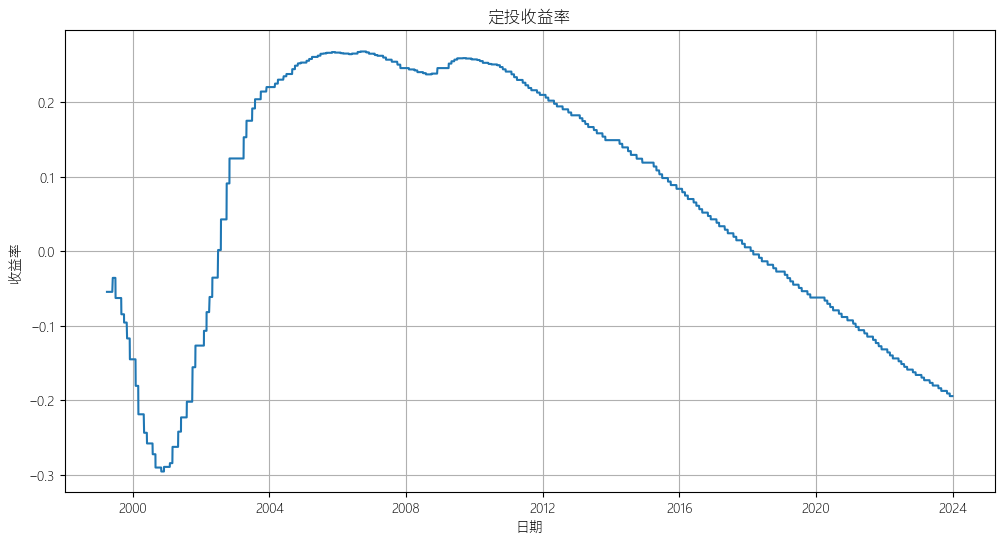

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制收益率图表
data['投入总资金'] = np.cumsum(np.where(data['日期'].dt.day == 1, 100, 0))
data['收益率'] = (data['总价值'] - data['投入总资金']) / data['投入总资金']

plt.figure(figsize=(12, 6))
sns.lineplot(x='日期', y='收益率', data=data)
plt.xlabel('日期')
plt.ylabel('收益率')
plt.title('定投收益率')
plt.grid(True)
plt.show()